<a href="https://colab.research.google.com/github/learning-botman/Project-Title-COVID-19-Global-Data-Tracker/blob/main/finalprojectsample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Upload and Load the Dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving owid-covid-data.csv to owid-covid-data.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


 Step 2: Explore the Data

In [3]:
# View column names
df.columns

# Summary of dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302512 entries, 0 to 302511
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302512 non-null  object 
 1   continent                                   288160 non-null  object 
 2   location                                    302512 non-null  object 
 3   date                                        302512 non-null  object 
 4   total_cases                                 266771 non-null  float64
 5   new_cases                                   294064 non-null  float64
 6   new_cases_smoothed                          292800 non-null  float64
 7   total_deaths                                246214 non-null  float64
 8   new_deaths                                  294139 non-null  float64
 9   new_deaths_smoothed                         292909 non-null  float64
 

,0
iso_code,0
continent,14352
location,0
date,0
total_cases,35741
...,...
population,0
excess_mortality_cumulative_absolute,292217
excess_mortality_cumulative,292217
excess_mortality,292217


Step 3: Clean the Data

In [4]:
# Filter for selected countries
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows missing total_cases
df = df.dropna(subset=['total_cases'])

# Fill other missing values
df.fillna(0, inplace=True)


/tmp/ipython-input-923161116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


Step 4: Visualize Trends (Cases, Deaths)

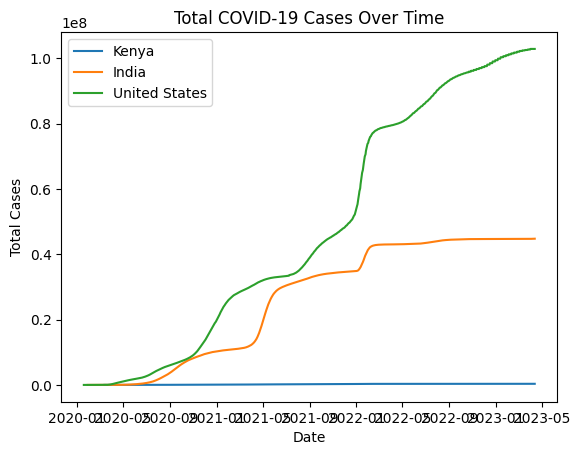

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot: Total cases over time
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()


Step 5: Vaccination Analysis

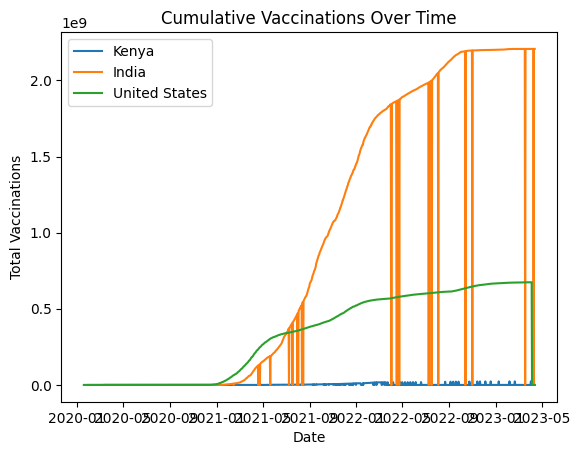

In [6]:
# Cumulative vaccinations
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title('Cumulative Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


Step 6: Optional Choropleth Map with Plotly

In [7]:
import plotly.express as px

# Use the most recent data
latest_df = df[df['date'] == df['date'].max()]

# Plot total cases by country
fig = px.choropleth(latest_df,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title="Total COVID-19 Cases by Country (Latest)")
fig.show()
